In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
dat = pd.read_excel("athletewise data.xlsx").drop('Athlete', axis=1)
dat.head()

,PTS,MIN,FTM,PA,FGA,FGM,PM,FTA,OREB,DREB,REB,AST,BLK,STL,TO,PF,Game Score
0,5.000000,6.000000,0.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.900000
1,0.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.700000
2,0.000000,12.000000,0.000000,3.000000,4.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,4.000000,1.000000,-4.900000
3,4.000000,5.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,3.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,5.800000
4,6.639344,24.983607,1.393443,0.262295,5.721311,2.606557,0.032787,2.344262,2.688525,4.852459,7.540984,0.819672,0.262295,0.754098,2.508197,2.147541,4.778689


Standardizing data

In [4]:
std_df = ((dat - dat.mean())/dat.std())
std_df.head()

,PTS,MIN,FTM,PA,FGA,FGM,PM,FTA,OREB,DREB,REB,AST,BLK,STL,TO,PF,Game Score
0,-0.157531,-1.231788,-0.753446,0.176991,-0.554906,-0.081878,0.611299,-0.832354,-0.827006,-1.170442,-1.199834,-0.834596,-0.549266,-0.851389,0.470506,0.515326,-0.632495
1,-1.124553,-1.544938,-0.753446,-0.335499,-1.062283,-1.089549,-0.613612,-0.832354,-0.827006,-1.170442,-1.199834,-0.834596,-0.549266,0.240392,-0.328804,-1.352538,-0.954551
2,-1.124553,-0.605488,-0.753446,0.689481,-0.301217,-1.089549,-0.613612,0.344459,0.030591,-1.170442,-0.810299,0.533525,-0.549266,0.240392,2.069125,-0.418606,-1.799950
3,-0.350935,-1.336172,-0.753446,-0.335499,-0.554906,-0.081878,-0.613612,-0.832354,1.745783,-1.170442,-0.031229,0.533525,-0.549266,-0.851389,-1.128113,-0.418606,0.353804
4,0.159526,0.749784,0.308597,-0.713565,0.135461,0.223727,-0.573451,0.547025,1.478663,1.513843,1.737642,-0.273891,-0.072035,-0.028079,0.876712,0.653119,0.148229


Computing inertias (a.k.a Within Cluster Sum of Squares) for k values 2-50

In [5]:
inertias = []
for k in range(2,51):
    temp = KMeans(n_init=10, n_clusters=k).fit(std_df)
    inertias.append(temp.inertia_)

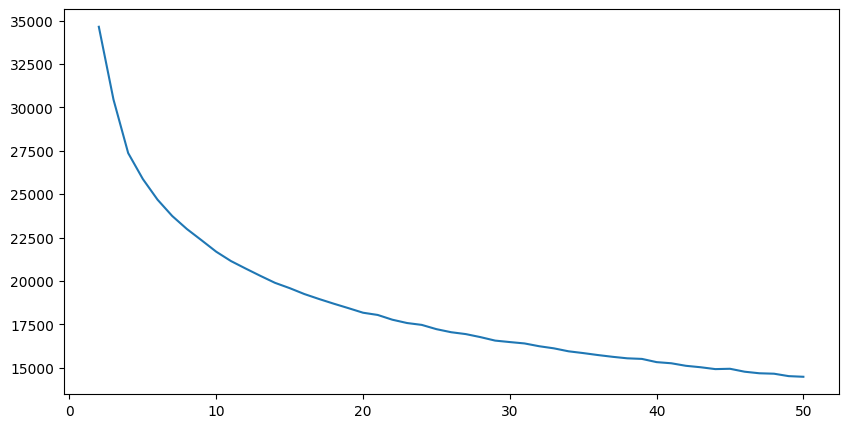

In [6]:
plt.figure(figsize=(10,5))
plt.plot(range(2,51), inertias)

Via the "Elbow Method", the optimal k value seems to be 11. We will consider this k value and calculate some more metrics for evaluating clustering models. Since we do not have any ground-truth values available, we will use the following metrics:

In [12]:
kmeansmodel = KMeans(n_init=10, n_clusters=11).fit(std_df)
labels = kmeansmodel.labels_

print(metrics.silhouette_score(std_df, labels)) #Ranges from -1 to 1 with higher values being better
print(metrics.calinski_harabasz_score(std_df, labels)) #Higher value is better
print(metrics.davies_bouldin_score(std_df, labels)) #Values closer to 0 are better


0.1460387965823916
422.6822255163884
1.8739702937790705


Overall, the K-Means model produces undesirable results considering the inertia and other metrics. This could be due to the fact that K-Means utilizes distances; the Curse of Dimensionality ensures that our multidimensional data does not deal well with distances.

We may continue with K-Means and other distance/metric based clustering approaches after applying dimensionality-reduction techniques like PCA, or we can explore other clustering algorithms as well.